In [1]:
import TO_sim.Q_simul as QSIM
# import TO_sim.analytical.order_sec_parameter as OSP
import TO_sim.analytical.sec_order_parameter2 as OSP2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd
from scipy.integrate import quad
from scipy import interpolate

In [2]:
import imp
imp.reload(QSIM)
imp.reload(OSP2)

<module 'TO_sim.analytical.sec_order_parameter2' from '/Users/kimgug-young/Desktop/KURAMOTO 1st order/Kuramoto-model/TO_sim/analytical/sec_order_parameter2.py'>

In [4]:
import sympy

In [14]:
omega,K,r,m = sympy.symbols('Omega K r m',real=True)

In [36]:
a = 1/sympy.sqrt(K*r*m)
b = omega/(K*r)

In [37]:
M_eR = 1/2*(-1)*(a**2/(a**4+b**2))
M_eI = 1/2*(a**2/b)*(a**2/(a**4+b**2))

In [38]:
M_eR.simplify()

-0.5*K*m*r/(Omega**2*m**2 + 1)

In [35]:
M_eI.simplify()


0.25*K*r/(4*Omega**3*m**2 + Omega)

In [21]:
IM

0.25*K*r*re(1/((K*m*r)**1.0*((K*m*r)**(-2.0) + 4*Omega**2/(K**2*r**2))))*re((K*m*r)**(-1.0))/Omega + (-0.25*K*r*im((K*m*r)**(-1.0))/Omega - 0.5)*im(1/((K*m*r)**1.0*((K*m*r)**(-2.0) + 4*Omega**2/(K**2*r**2))))

In [42]:
(a**-3 *K*r).simplify()

K*r*(K*m*r)**(3/2)

## cluste의 속도를 정하는 것

In [77]:
m = 6
F_RMd,F_RMu,F_R0d,F_R0u =  OSP2.Make_R_function(m)

In [84]:
N = 5000
K = 8
Qsimul = QSIM.Q_Norm_simul(N,K=K,m = m,t_end=8000,start_p=True,seed=10)
sol = Qsimul.solve()

In [85]:
cluster_info = Qsimul.get_cluster()
r_clu_info = Qsimul.get_r_clu()

In [86]:
t_mean = r_clu_info['t_mean']
r0 = r_clu_info['r_clu_mean']['0'][-1]
rp = r_clu_info['r_clu_mean']['+'][-1]
rm = r_clu_info['r_clu_mean']['-'][-1]

In [87]:
_,rptA,_,rpA,_,_ = OSP2.get_r_sec_np(K,m,F_RMu,samples=30)

In [88]:
K_ = np.linspace(0,15,1000)
I_FR0u = interpolate.interp1d(F_R0u(K_),K_)
K_match = I_FR0u(r0)
O_O = 4/np.pi * np.sqrt(F_RMu(K_match)*K_match/m) - 0.3056*1/np.sqrt(K_match*F_RMu(K_match)*m**3)
shift_O = OSP2.get_shift_O(r0,rp,O_O,K,m)
O_p2 = 4/np.pi * np.sqrt(rp*K/m) - 0.3056*1/np.sqrt(K*rp*m**3)

In [89]:
t = r_clu_info['t']

In [90]:
rpA

array([0.05710004])

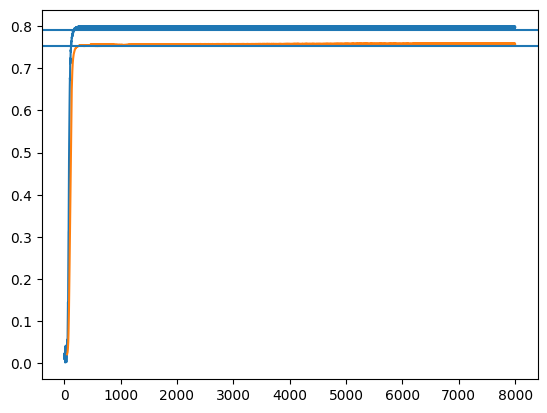

In [93]:
plt.plot(t,r_clu_info['r_clu']['0'])
plt.plot(t_mean,r_clu_info['r_total_mean'])
plt.axhline(F_R0u(K))
plt.axhline(F_RMu(K))

(7900.0, 8000.0)

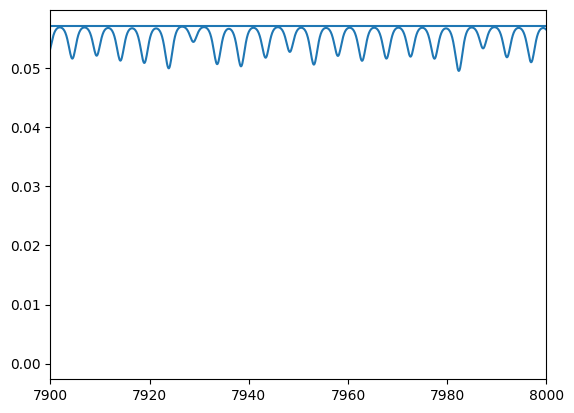

In [94]:
plt.plot(t,r_clu_info['r_clu']['+'])
plt.axhline(rpA)
plt.xlim(7900,8000)

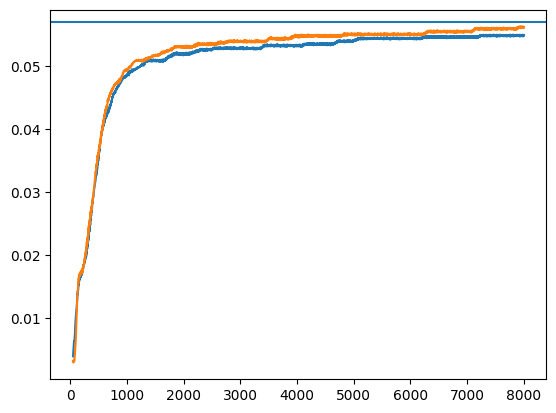

In [95]:
plt.plot(t_mean,r_clu_info['r_clu_mean']['+'])
plt.plot(t_mean,r_clu_info['r_clu_mean']['-'])
plt.axhline(rpA)
# plt.plot(t,r_clu_info['r_clu_mean']['0'])

In [422]:
O_O

0.8184039023543687

In [423]:
omega = Qsimul.omega
shift_O = OSP2.get_shift_O(r0,rpA,O_O,K,m)
F_S,F_OR = OSP2.get_shift(O_O)

In [424]:
F_S(O_p2) + O_O

1.1245114751338705

In [425]:
F_OR(omega[-1]-shift_O) 

array([1.36996161])

In [426]:
TEMP = F_S(O_p2)

In [427]:
O_C = O_O + shift_O
A = O_C*(1- 0.5 * (K*r0)**2/(O_C**2+m**2*O_C**4))

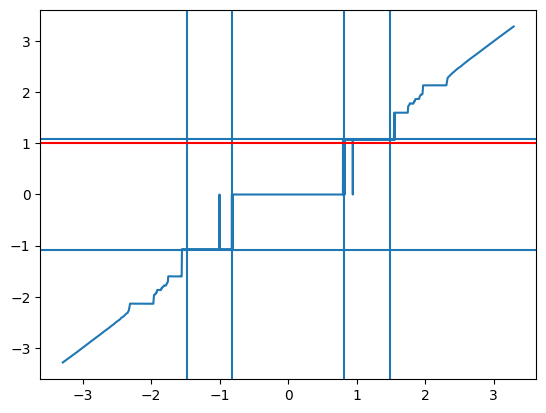

In [428]:
plt.plot(omega,cluster_info['avg_dtheta_last'])
plt.axvline(O_O)
plt.axhline(O_O+shift_O)
plt.axvline(O_O+shift_O+O_p2)
plt.axvline(-O_O)
plt.axvline(-(O_O+O_p2+shift_O))
plt.axhline(-(O_O+shift_O))
plt.axhline(A,color ='red')


## K_M space re

In [32]:
import parmap
import TO_sim.parmap_use as PU
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [33]:
import imp
imp.reload(PU);

In [34]:
# seed,N,K,m_span,t_end,start_p
args = 0,10,500,(0.0,0.1,0.1),220,True
data = PU.KM_space_ms(*args)

In [35]:
df = pd.DataFrame(columns=data.keys())

In [36]:
df.keys()

Index(['Ks', 'r0', 'rM', 'r+', 'r+_total', 'r-', 'r-_total', 'S0', 'S+', 'S-',
       'V0', 'V+', 'V-', 'sig', 'sig_+total', 'sig_-total'],
      dtype='object')

In [37]:
ms = np.arange(0,10+0.1/2,0.1)

In [57]:
N = 5000
K = 5
K_span = (0,10,0.1)
t_end = 8000
core = 12

In [58]:
index_ = 68 + 16
m_set = [] 
for i in range(len(ms)//core +1):
    m_set.append(ms[index_:index_+core])
    index_ += core
num = 0

In [59]:
len(m_set[1])


5

In [62]:
m_set = m_set[:2]

In [63]:
m_set

[array([8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5]),
 array([ 9.6,  9.7,  9.8,  9.9, 10. ])]

In [64]:
for j,m_s in enumerate(m_set,3):
    df = pd.DataFrame(columns=data.keys())
    for i,data in enumerate(parmap.map(PU.KM_space_ms,m_s,seed=10,N=N,K_span =K_span,t_end=t_end,start_p=True,pm_pbar=True, pm_processes=12)):
        df.loc[i] = data
    Ks = df['Ks'][0]
    S0 = np.array([*df['S0'].to_numpy()]).T
    SP = np.array([*df['S+'].to_numpy()]).T
    SM = np.array([*df['S-'].to_numpy()]).T

    R0 = np.array([*df['r0'].to_numpy()]).T
    RM0 = np.array([*df['rM'].to_numpy()]).T
    RP = np.array([*df['r+'].to_numpy()]).T
    RPT = np.array([*df['r+_total'].to_numpy()]).T
    RM = np.array([*df['r-'].to_numpy()]).T
    RMT = np.array([*df['r-_total'].to_numpy()]).T

    V0 = np.array([*df['V0'].to_numpy()]).T
    VP = np.array([*df['V+'].to_numpy()]).T
    VM = np.array([*df['V-'].to_numpy()]).T

    SIG = np.array([*df['sig'].to_numpy()]).T
    SIGP = np.array([*df['sig_+total'].to_numpy()]).T
    SIGM = np.array([*df['sig_-total'].to_numpy()]).T
    np.savez(f'./Ensembles/KM space/N = {N} pv {j}',Ks=Ks,ms=m_s,S0=S0,SP=SP,SM=SM,R0=R0,RM0=RM0,RP=RP,RPT=RPT,RM=RM,RMT=RMT,SIG=SIG,V0=V0,VP=VP,VM=VM,SIGP=SIGP,SIGM=SIGM)

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
import parmap
import TO_sim.parmap_use as PU
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
import TO_sim.analytical.order_sec_parameter as OSP

In [46]:
N = 5000

In [47]:
temp = glob.glob(rf'./Ensembles/KM space/N = {N} pv *.npz')

In [23]:
temp = []
for i in np.arange(0,13):
    temp.append(rf'./Ensembles/KM space/N = {N} pv {i}.npz')

In [24]:
A['S0'].shape

NameError: name 'A' is not defined

In [25]:
ms = np.arange(0,10.05,0.1)
Ks = np.arange(0,10.05,0.1)

In [26]:
A = np.load(temp[0],allow_pickle=True)
KEY = [*A.keys()][2:]
T = {}
for key in KEY:
    for f in temp[1:2]:
        B =  np.load(f,allow_pickle=True)
        temp_ = np.concatenate([A[key],B[key]],axis=1)
        T[key] = temp_
            
    for f in temp[2:]:
        B =  np.load(f,allow_pickle=True)
        T[key] = np.concatenate([T[key],B[key]],axis=1)

In [16]:
KEY

['S0',
 'SP',
 'SM',
 'R0',
 'RM0',
 'RP',
 'RPT',
 'RM',
 'RMT',
 'SIG',
 'V0',
 'VP',
 'VM',
 'SIGP',
 'SIGM']

In [27]:
df_new = pd.DataFrame(columns=['S0','S+','S-','rm','r0','r+','r-','r+_total','r-_total','sig','sig+_total','sig-_total','v0','v+','v-','K','m'])
df_new = df_new.set_index(['K','m'])


In [28]:
MAP = {'S0':'S0','S+':'SP','S-':'SM','rm':'RM0','r0':'R0','r+':'RP','r-':'RM','r+_total':'RPT','r-_total':'RMT','sig':'SIG','sig+_total':'SIGP','sig-_total':'SIGM','v0':'V0','v+':'VP','v-':'VM'}

In [29]:
df_KEY = ['S0', 'S+', 'S-', 'rm', 'r0', 'r+', 'r-', 'r+_total', 'r-_total', 'sig',
       'sig+_total', 'sig-_total', 'v0', 'v+', 'v-']

In [30]:
for key in df_KEY:
    for i,K in enumerate(Ks):
        for j,m in enumerate(ms):
            df_new.loc[(K,m),key] = T[MAP[key]][i][j]

In [50]:
df_new.sort_index().to_excel(f'N = {N} seed = 10 QNORMAL w pv.xlsm')

In [ ]:
S0,SP,SM,R0,RM0,RP,RPT,RM,RMT,V0,VP,VM,SIG,SIGP,SIGM  = T

In [ ]:
np.savez(f'./Ensembles/N = {N} K = {K}',ms=ms,S0=S0,SP=SP,SM=SM,R0=R0,RM0=RM0,RP=RP,RPT=RPT,RM=RM,RMT=RMT,SIG=SIG,V0=V0,VP=VP,VM=VM,SIGP=SIGP,SIGM=SIGM)


In [52]:
df_new = pd.read_excel(f'N = {N} seed = 10 QNORMAL wo pv.xlsm',index_col=[0,1])

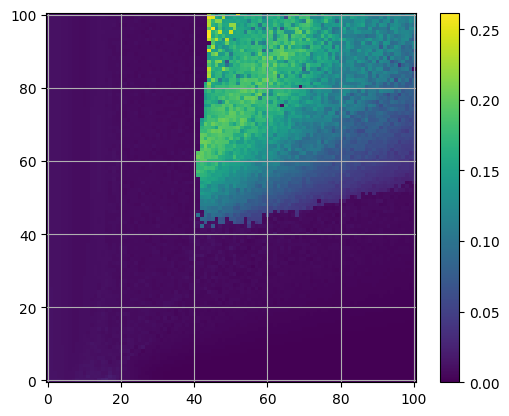

In [32]:
plt.imshow(df_new['sig'].unstack().to_numpy(float).T,origin='lower')
plt.colorbar()
plt.grid()

In [53]:
df_A = pd.read_excel(f'NEW Order parameter and secondary cluster NEW.xlsm',index_col=[0,1])
df_A2 = pd.read_excel('Order parameter and secondary cluster with rsecd.xlsm',index_col=[0,1])
# df_A2 = pd.read_excel('Order parameter and secondary cluster wo rsecd.xlsm',index_col=[0,1])


(0.0, 10.0)

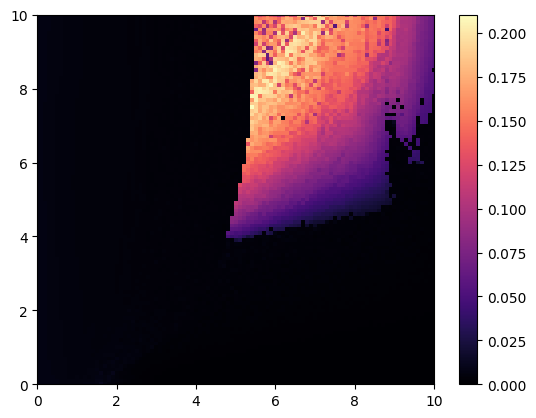

In [54]:
KK = df_new.index.to_frame().K.unstack().to_numpy().T
MM = df_new.index.to_frame().m.unstack().to_numpy().T
# plt.pcolormesh(KK,MM,df_new['main_o'].unstack().to_numpy().T)
plt.pcolormesh(KK,MM,df_new['sig'].unstack().to_numpy(float).T,cmap='magma')
plt.colorbar()
plt.xlim(0,10)
plt.ylim(0,10)

In [59]:
KKA = df_A.index.to_frame().K.unstack().to_numpy().T
MMA = df_A.index.to_frame().m.unstack().to_numpy().T

KKA2 = df_A2.index.to_frame().K.unstack().to_numpy().T
MMA2 = df_A2.index.to_frame().m.unstack().to_numpy().T
r_ul = df_A['r+_ul'].apply(lambda x: np.where(x>=0.000,x,np.nan)).unstack().to_numpy(float).T
r_0 = df_A['r0_u'].apply(lambda x: np.where(x>=0.000,x,np.nan)).unstack().to_numpy(float).T
r_m = df_A['rM_u'].apply(lambda x: np.where(x>=0.000,x,np.nan)).unstack().to_numpy(float).T

r_ul2 = df_A2['r_sec_ul'].apply(lambda x: np.where(x>=0.000,x,np.nan)).unstack().to_numpy(float).T
r_02 = df_A2['r_main_u'].apply(lambda x: np.where(x>=0.000,x,np.nan)).unstack().to_numpy(float).T
RSTD = OSP.get_rstd(r_m,r_0,r_ul,KKA,MMA)


TypeError: get_rstd() takes 4 positional arguments but 5 were given

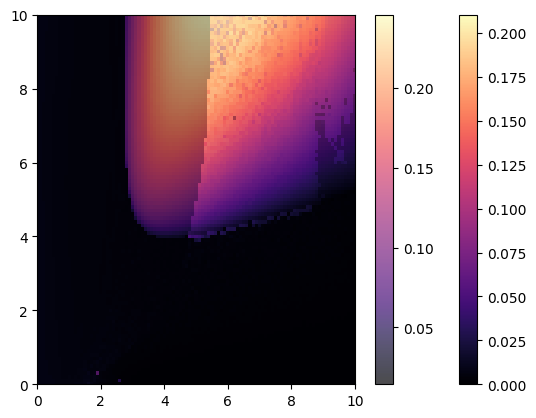

In [57]:
plt.pcolormesh(KK,MM,df_new['sig'].unstack().to_numpy(float).T,cmap='magma')
plt.colorbar()
plt.pcolormesh(KKA,MMA,RSTD,cmap='magma',alpha=0.7)
plt.xlim(0,10)
plt.ylim(0,10)
plt.colorbar()

In [38]:
RP = df_new['r+'].unstack().to_numpy(float).T
R0 = df_new['r0'].unstack().to_numpy(float).T
RM = df_new['rm'].unstack().to_numpy(float).T
RPA = df_A['r+_ul'].unstack().to_numpy(float).T[:101,:101]
R0A = df_A['r0_u'].unstack().to_numpy(float).T[:101,:101]
RMA = df_A['rM_u'].unstack().to_numpy(float).T[:101,:101]

RPA2 = df_A2['r_sec_u'].unstack().to_numpy(float).T
R0A2 = df_A2['r_main_u'].unstack().to_numpy(float).T

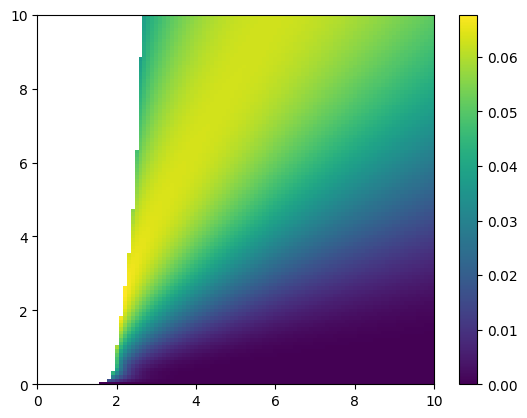

In [39]:
plt.pcolormesh(KK,MM,abs(RMA-R0A))

plt.xlim(0,10)
plt.ylim(0,10)
plt.colorbar()

In [40]:
OPM = OSP2.get_OPM(RMA,KK,MM)
Rp = KK*RPA**2/(OPM*(1+m**2*OPM**2))

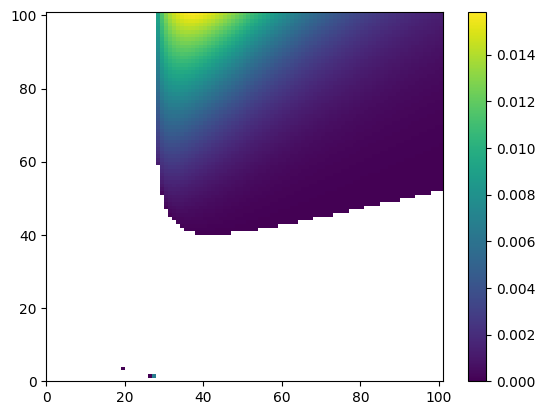

In [41]:
plt.pcolormesh(Rp,vmin=0)
plt.colorbar()

In [42]:
np.nansum(np.dstack((RMA,Rp)),axis=2)

array([[0.        , 0.        , 0.        , ..., 0.99469545, 0.99480419,
        0.99490943],
       [0.        , 0.        , 0.        , ..., 0.99469545, 0.99480419,
        0.99490943],
       [0.        , 0.        , 0.        , ..., 0.99469545, 0.99480419,
        0.99490943],
       ...,
       [0.        , 0.        , 0.        , ..., 0.6348769 , 0.63958578,
        0.64423167],
       [0.        , 0.        , 0.        , ..., 0.63034163, 0.6350624 ,
        0.63972731],
       [0.        , 0.        , 0.        , ..., 0.6258467 , 0.630583  ,
        0.63525152]])

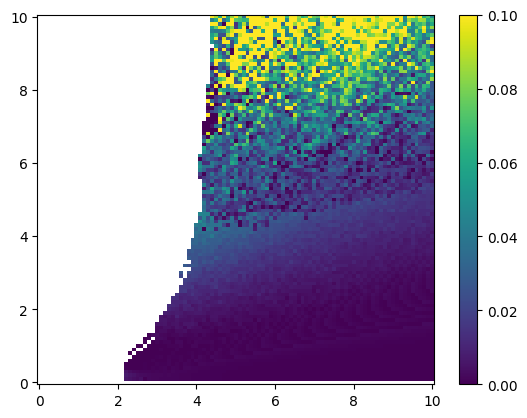

In [43]:
plt.pcolormesh(KK,MM,(np.where(~np.isnan(R0),RM,np.nan) - np.nansum(np.dstack((RMA,Rp)),axis=2)),vmax=0.1,vmin=0)
plt.colorbar()

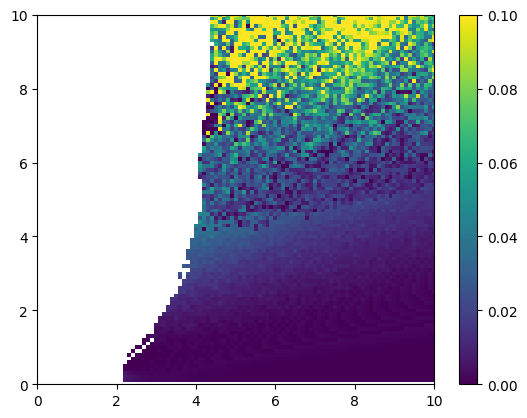

In [44]:
plt.pcolormesh(KK,MM,(np.where(~np.isnan(R0),RM,np.nan) - RMA[:101,:101]),vmax=0.1,vmin=0)

plt.xlim(0,10)
plt.ylim(0,10)
plt.colorbar()

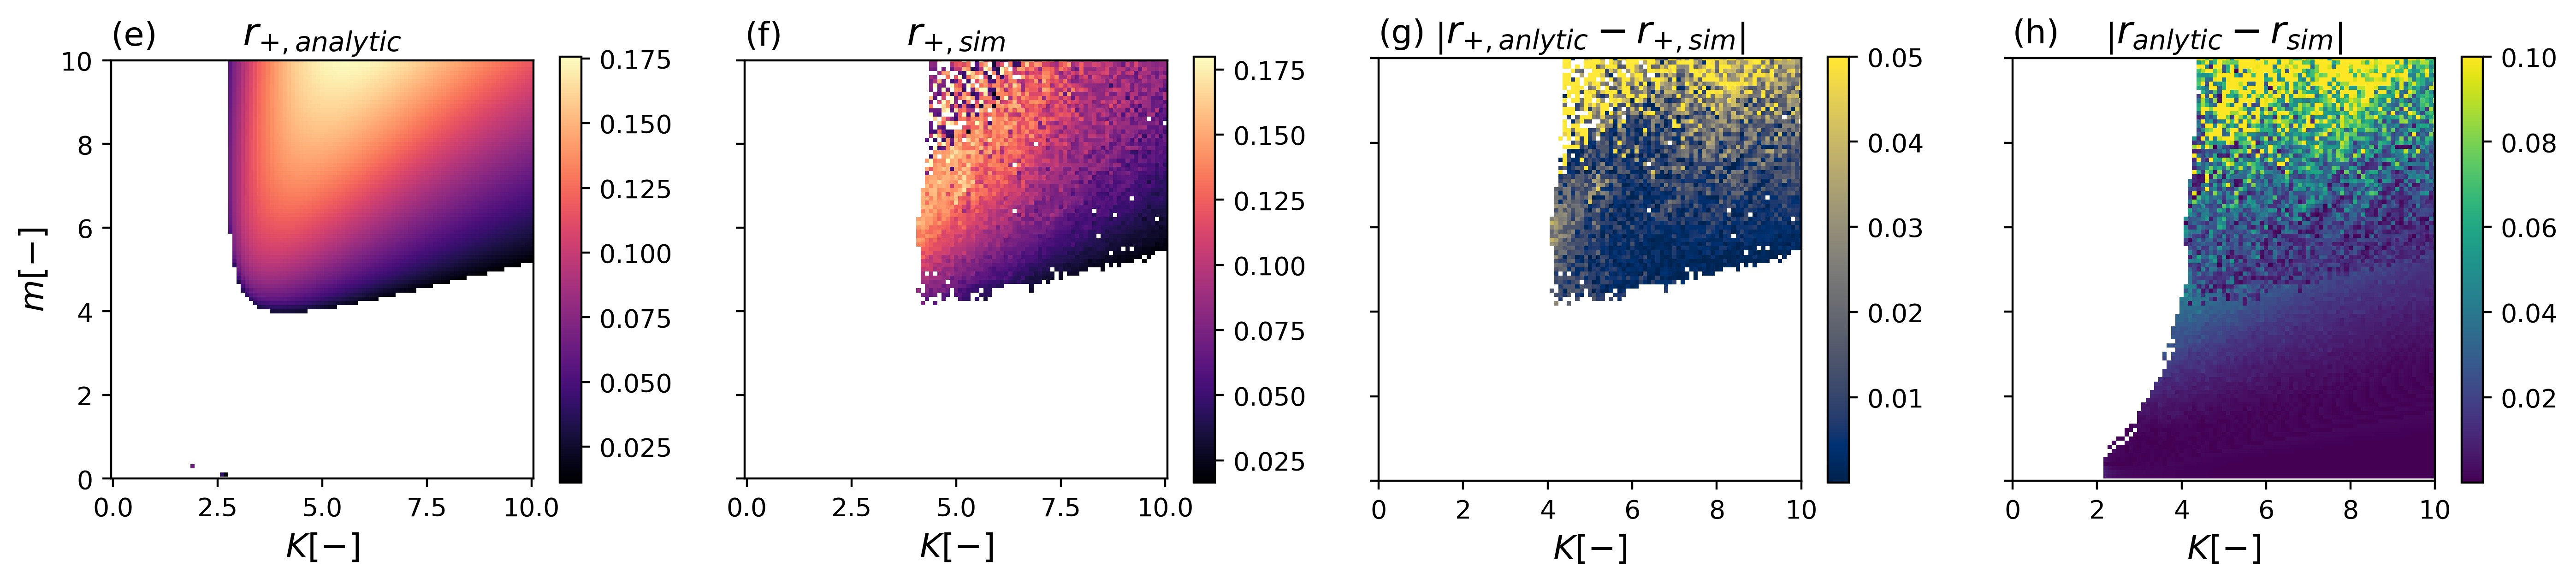

In [45]:
P = RP - RPA[:101,:101]
fig,axs = plt.subplots(1,4,figsize=(17,4),sharey=True,dpi=400)
plt.sca(axs[0])
plt.pcolormesh(KK,MM,RPA,cmap='magma')
plt.colorbar(shrink=0.75)
plt.ylabel(r'$m[-]$',fontsize=13)
plt.xlabel(r'$K[-]$',fontsize=13)
plt.title(r'$r_{+,analytic}$',fontsize=15)
plt.gca().set_aspect('equal')
plt.title('(e)',fontsize=13,loc='left')

plt.sca(axs[1])
plt.pcolormesh(KK,MM,RP,vmax=0.18,cmap='magma')
plt.gca().set_aspect('equal')
plt.colorbar(shrink=0.75)
plt.xlabel(r'$K[-]$',fontsize=13)
plt.title(r'$r_{+,sim}$',fontsize=15)
plt.title('(f)',fontsize=13,loc='left')

plt.sca(axs[2])
plt.pcolormesh(KK,MM,abs(P),vmax=0.05,cmap='cividis')
plt.xlim(0,10)
plt.ylim(0,10)

plt.title('(g)',fontsize=13,loc='left')

plt.xlabel(r'$K[-]$',fontsize=13)
plt.colorbar(shrink=0.75)
plt.title(r'$\left|r_{+,anlytic} - r_{+,sim}\right|$',fontsize=15)
plt.gca().set_aspect('equal')

plt.sca(axs[3])
plt.pcolormesh(KK,MM,abs(np.where(~np.isnan(R0),RM,np.nan) - RMA[:101,:101]),vmax=0.1)

plt.xlim(0,10)
plt.ylim(0,10)
plt.xlabel(r'$K[-]$',fontsize=13)
plt.colorbar(shrink=0.75)
plt.title('(h)',fontsize=13,loc='left')
plt.title(r'$\left|r_{anlytic} - r_{sim}\right|$',fontsize=15)
plt.gca().set_aspect('equal')

In [1]:
# plt.pcolormesh(KKA2,MMA2,abs(RP[1:,1:] - RPA2),vmax=0.05,cmap='Set2')
plt.pcolormesh(KKA,MMA,abs(RP - RPA[:101,:101]),vmax=0.05,cmap='Set2')

plt.xlim(0,10)
plt.ylim(0,10)
plt.colorbar()

NameError: name 'plt' is not defined

In [155]:
RSTD_ = df_new['sig'].unstack().to_numpy(float).T


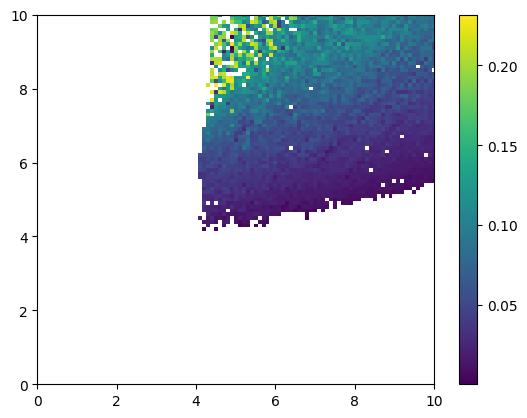

In [156]:
plt.pcolormesh(KK,MM,abs(RP - RSTD[:101,:101]),)

plt.xlim(0,10)
plt.ylim(0,10)
plt.colorbar()

In [ ]:
plt.pcolormesh(KK,MM,abs(RP - RPA[:101,:101]),)

plt.xlim(0,10)
plt.ylim(0,10)
plt.colorbar()

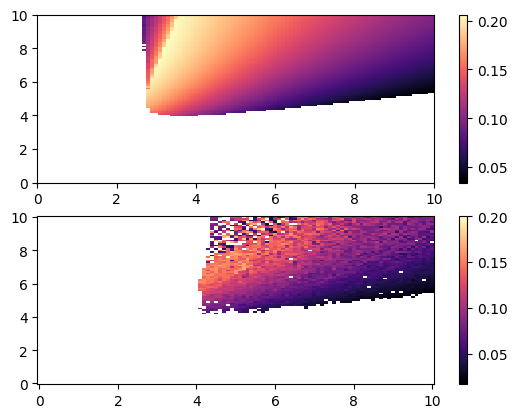

In [132]:
plt.subplot(212)

plt.pcolormesh(KK,MM,df_new['r+'].unstack().to_numpy(float).T,cmap='magma',vmax=0.2)
plt.colorbar()
plt.subplot(211)
plt.pcolormesh(KKA,MMA,df_A['r_sec_ul'].unstack().to_numpy(float).T,cmap='magma',alpha=1)

plt.xlim(0,10)
plt.ylim(0,10)
plt.colorbar()

## $K_C$

In [221]:
m = 4.04
F_RMd4,F_RMu4,F_R0d4,F_R0u4 =  OSP2.Make_R_function(m)
r_d = lambda x: (F_R0u4(x)-F_RMu4(x))/2

# Ks_check2 = np.arange(4.36,4.38,0.001)
Ks_check2 = np.arange(4.98,5.01,0.01)
rs_d_NEW,rs_u_NEW,rs_dFl_NEW,rs_uFl_NEW,md,mu = OSP2.get_r_sec_np(Ks_check2,m,F_RMu4,samples=150)

[4.98 4.99]


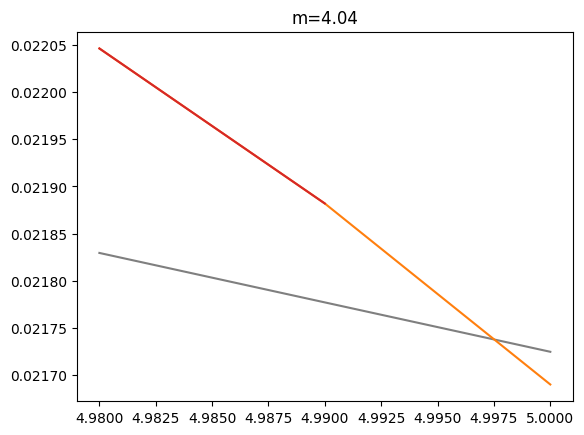

In [222]:
r_d = lambda x: (F_R0u4(x)-F_RMu4(x))/2

indexs, = np.where(r_d(Ks_check2)<=rs_uFl_NEW)
print(Ks_check2[indexs])
plt.plot(Ks_check2,rs_dFl_NEW,color='tab:orange')
plt.plot(Ks_check2,rs_uFl_NEW,color='tab:orange')
plt.plot(Ks_check2[indexs],rs_dFl_NEW[indexs],color='tab:red')
plt.plot(Ks_check2[indexs],rs_uFl_NEW[indexs],color='tab:red')
plt.title(f'm={m}')
# plt.plot(K_,(F_R0u4(K_)-F_RMu4(K_))/2,color='tab:grey',zorder=0)
plt.plot(Ks_check2,(F_R0u4(Ks_check2)-F_RMu4(Ks_check2))/2,color='tab:grey',zorder=0)

## R m

In [ ]:
F_RMd,F_RMu,F_R0d,F_R0u =  OSP2.Make_R_function(m)

In [290]:
r_m = {}

In [305]:
m = 4.4
N = 1000
K = 5
Qsimul = QSIM.Q_Norm_simul(N,K=K,m = m,t_end=8000,start_p=True,seed=10)
sol = Qsimul.solve()
cluster_info = Qsimul.get_cluster()
r_clu_info = Qsimul.get_r_clu()
t_mean = r_clu_info['t_mean']
t = sol['t']
rs = sol['rs']
# r0 = r_clu_info['r_clu_mean']['0'][-1]
# rp = r_clu_info['r_clu_mean']['+'][-1]
# rm = r_clu_info['r_clu_mean']['-'][-1]

In [306]:
r_m[m] = rs[-400:]

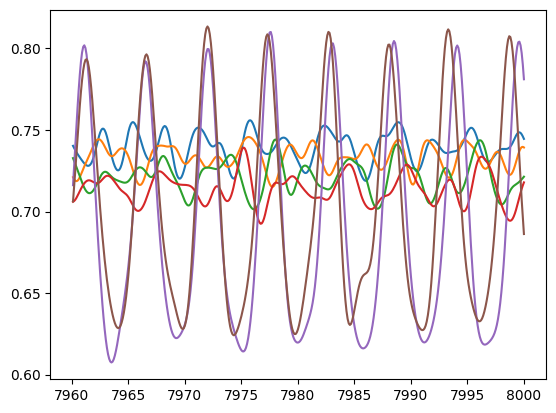

In [310]:
for m,rs in r_m.items():
    plt.plot(t[-400:],rs)


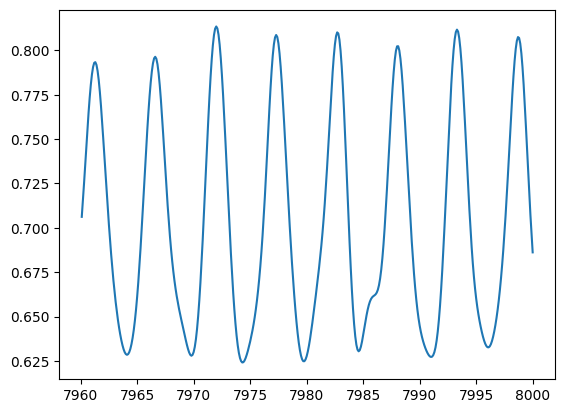

In [307]:
plt.plot(t[-400:],rs[-400:])